<a href="https://colab.research.google.com/github/portneon/VIKALP/blob/main/vikalp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pydub
!apt-get install ffmpeg -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


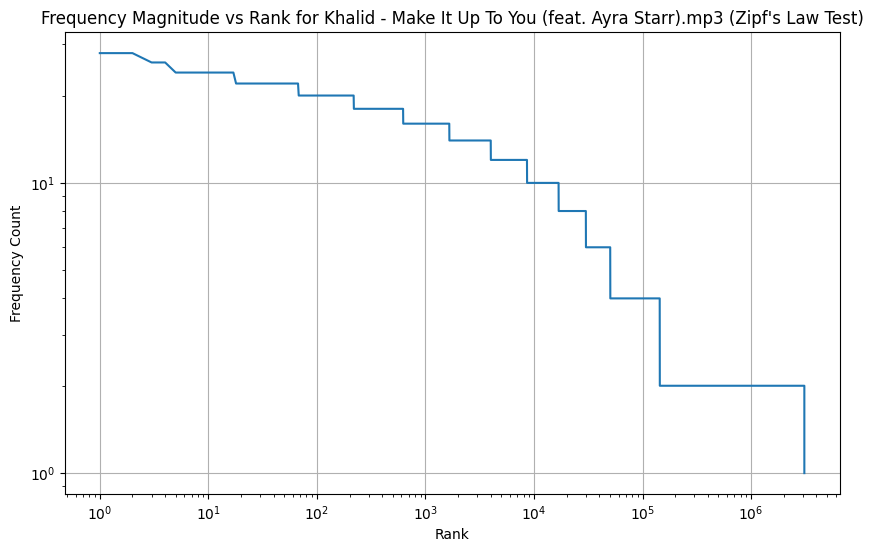

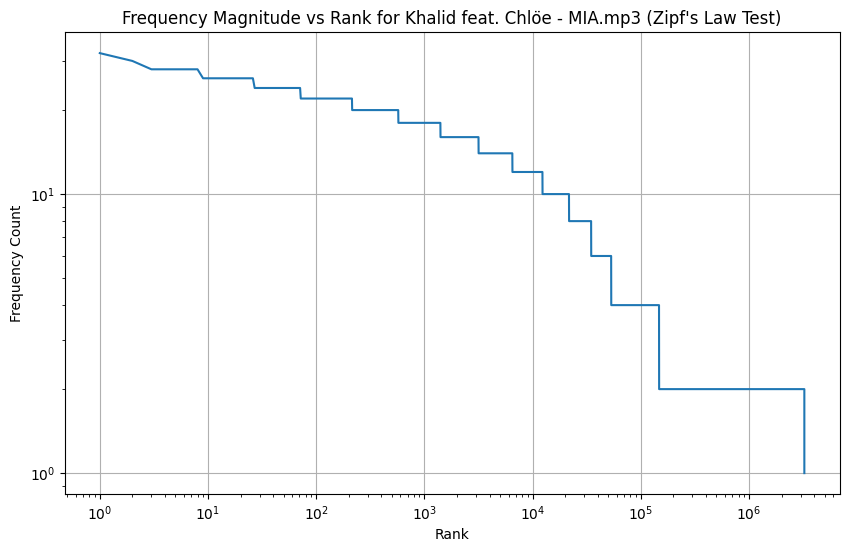

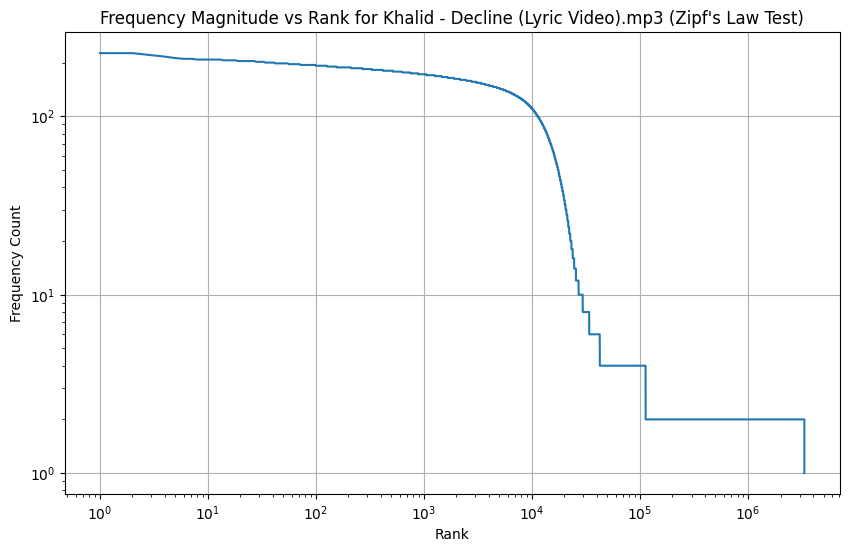

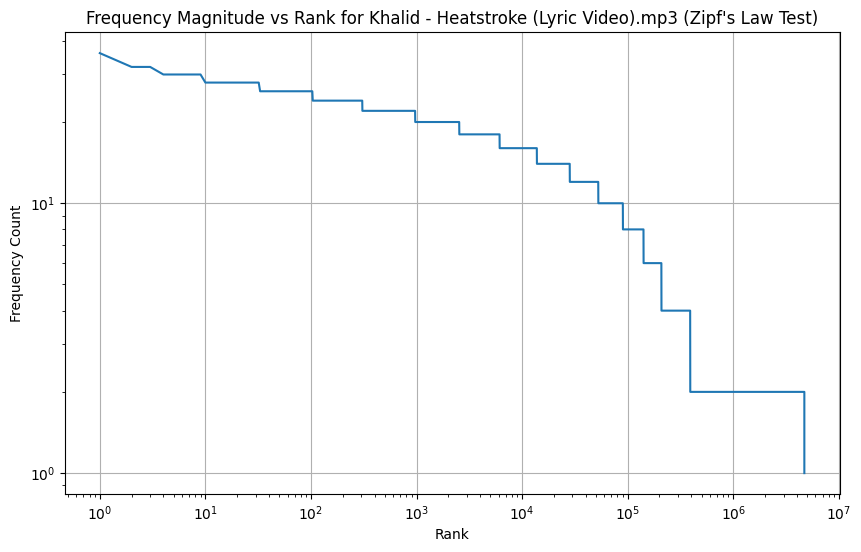

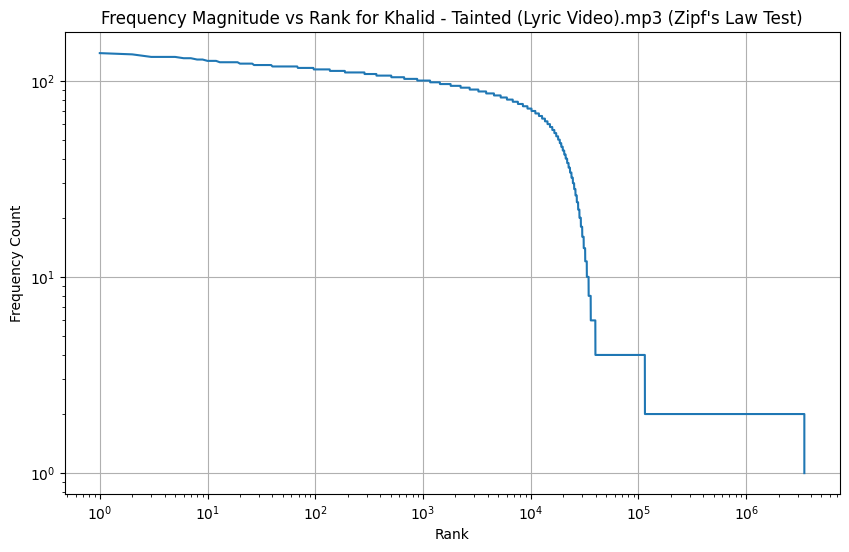

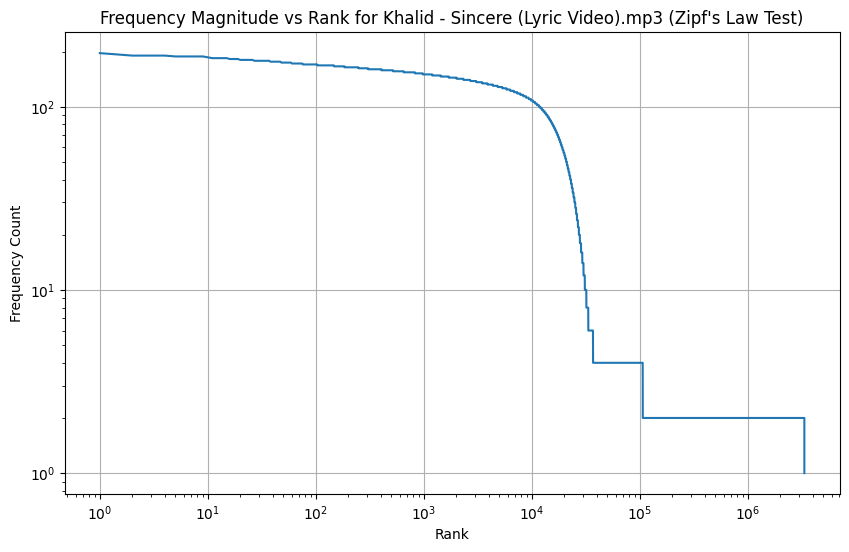

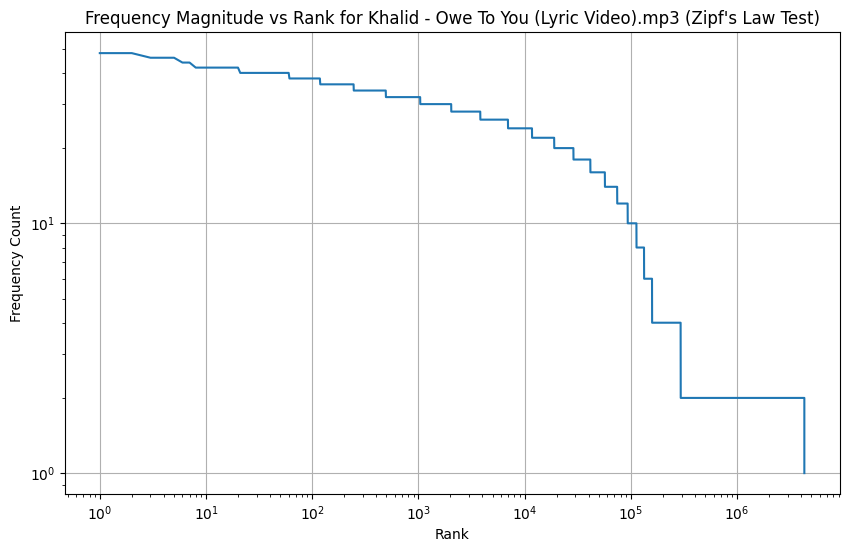

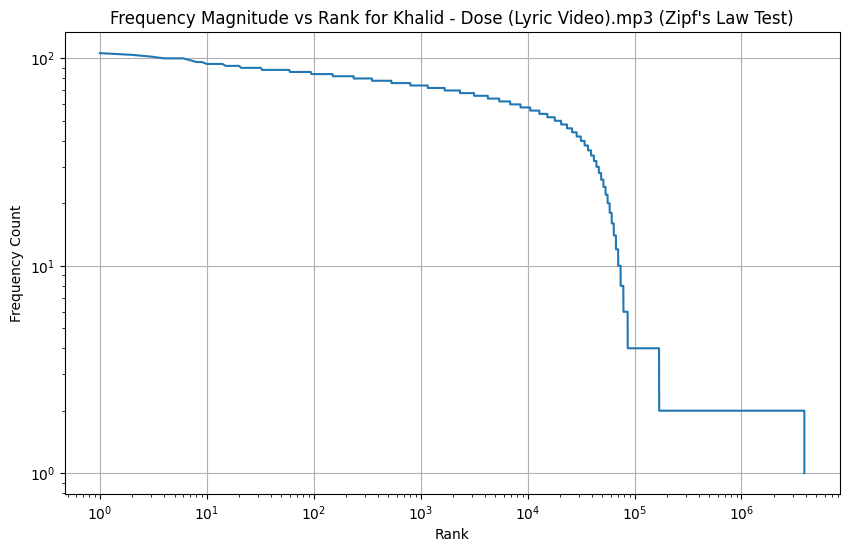

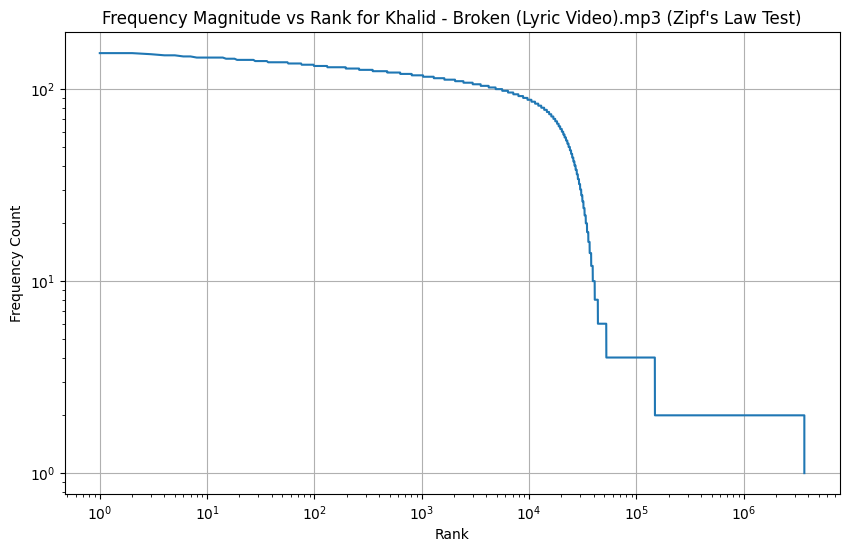

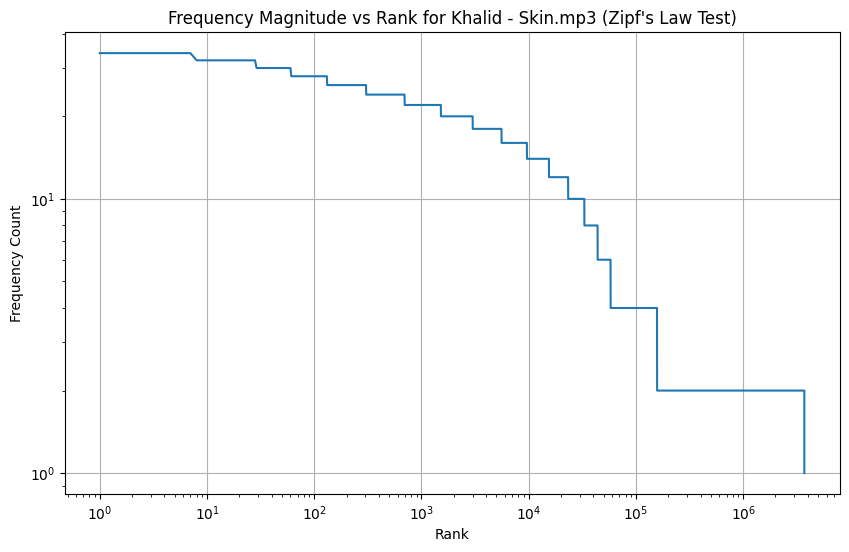

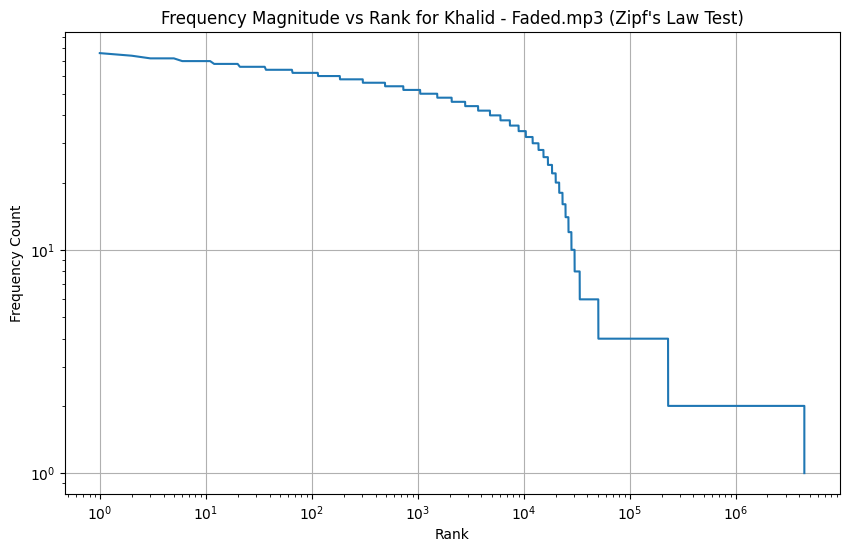

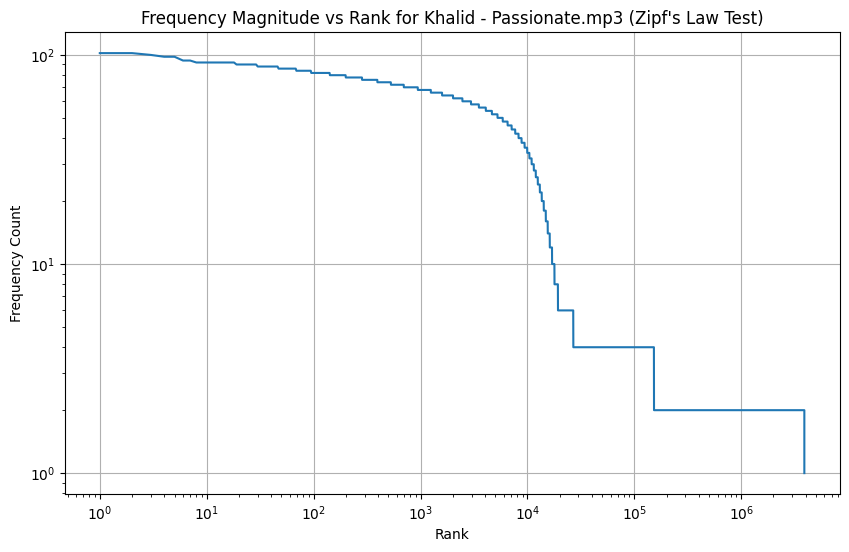

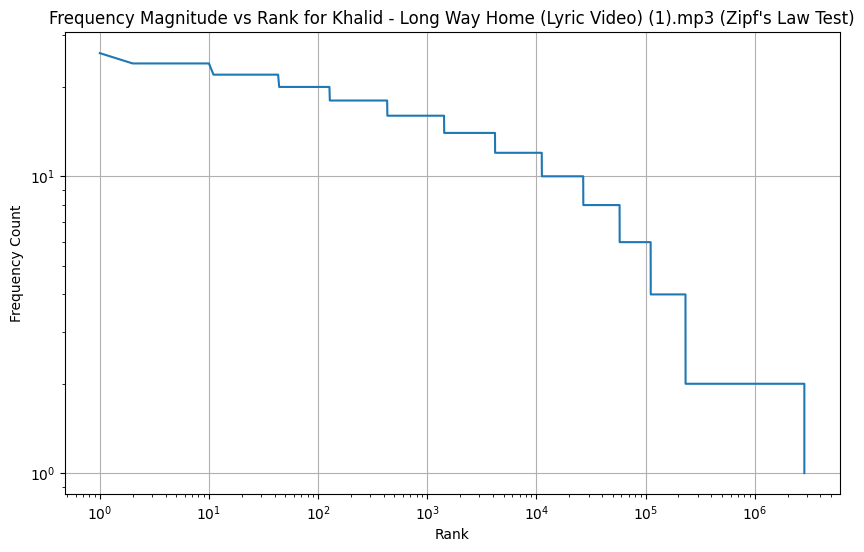

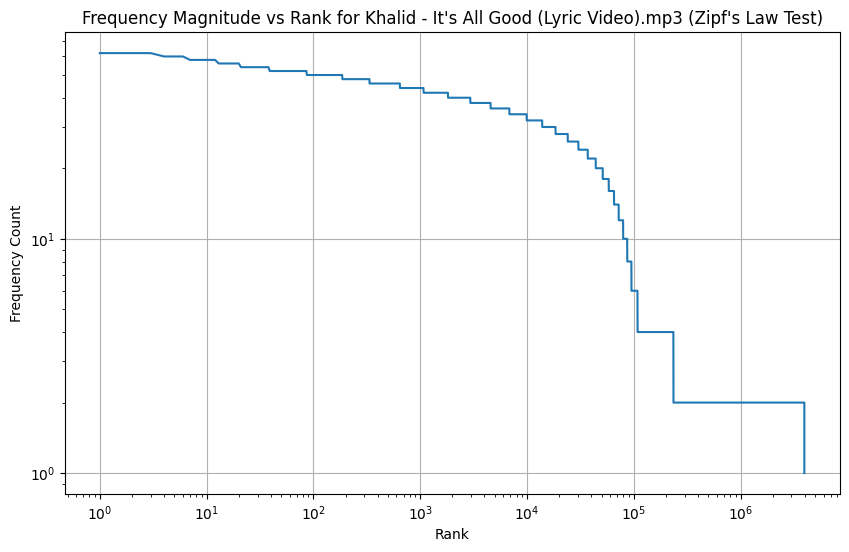

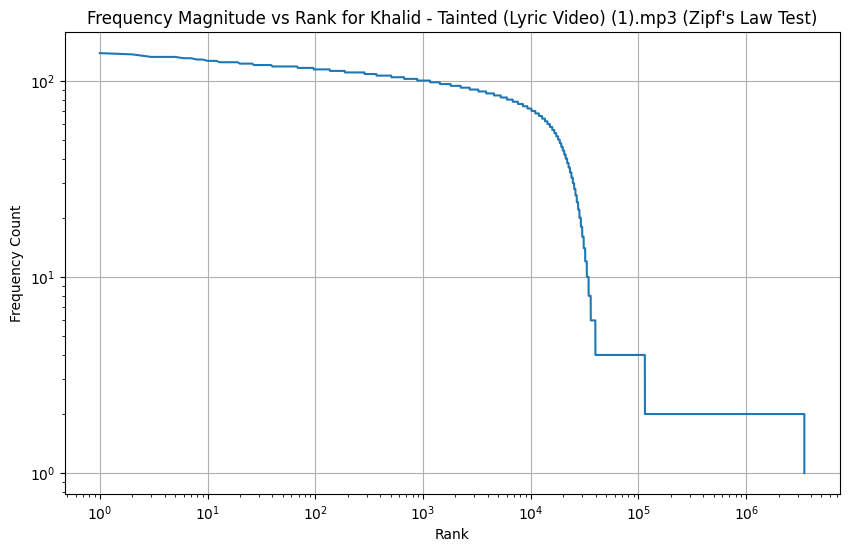

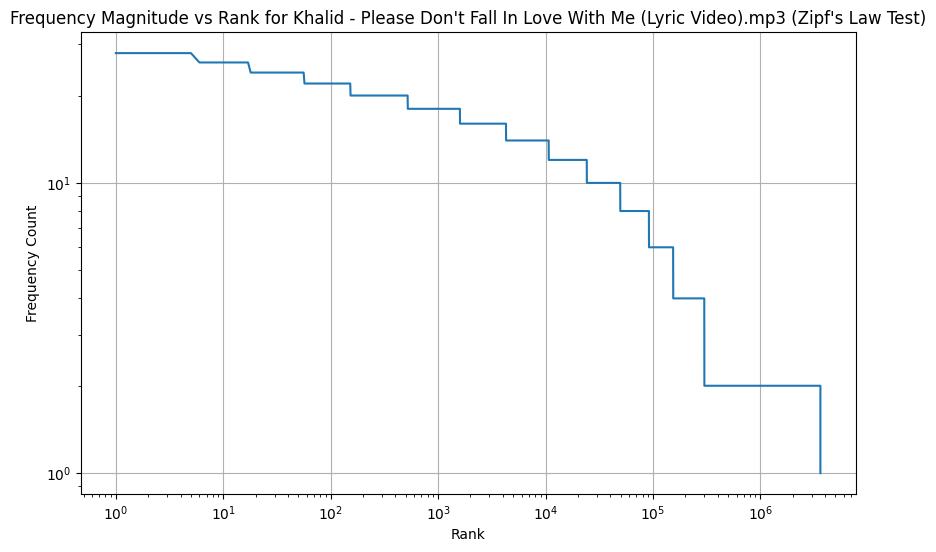

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from pydub import AudioSegment
import os

music_folder = "/content/drive/MyDrive/kahlid"
mp3_files = [f for f in os.listdir(music_folder) if f.endswith(".mp3")]

for mp3_file in mp3_files:

    mp3_path = os.path.join(music_folder, mp3_file)

    audio = AudioSegment.from_mp3(mp3_path)


    audio = audio.set_channels(1)

    wav_path = mp3_path.replace(".mp3", ".wav")
    audio.export(wav_path, format="wav")

    sample_rate, data = wavfile.read(wav_path)

    fft_result = np.fft.fft(data)
    frequencies = np.abs(fft_result)

    unique, counts = np.unique(np.round(frequencies, 1), return_counts=True)
    freq_count = dict(zip(unique, counts))


    sorted_counts = sorted(freq_count.values(), reverse=True)


    ranks = np.arange(1, len(sorted_counts) + 1)
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, sorted_counts)
    plt.title(f"Frequency Magnitude vs Rank for {mp3_file} (Zipf's Law Test)")
    plt.xlabel("Rank")
    plt.ylabel("Frequency Count")
    plt.grid(True)
    plt.show()


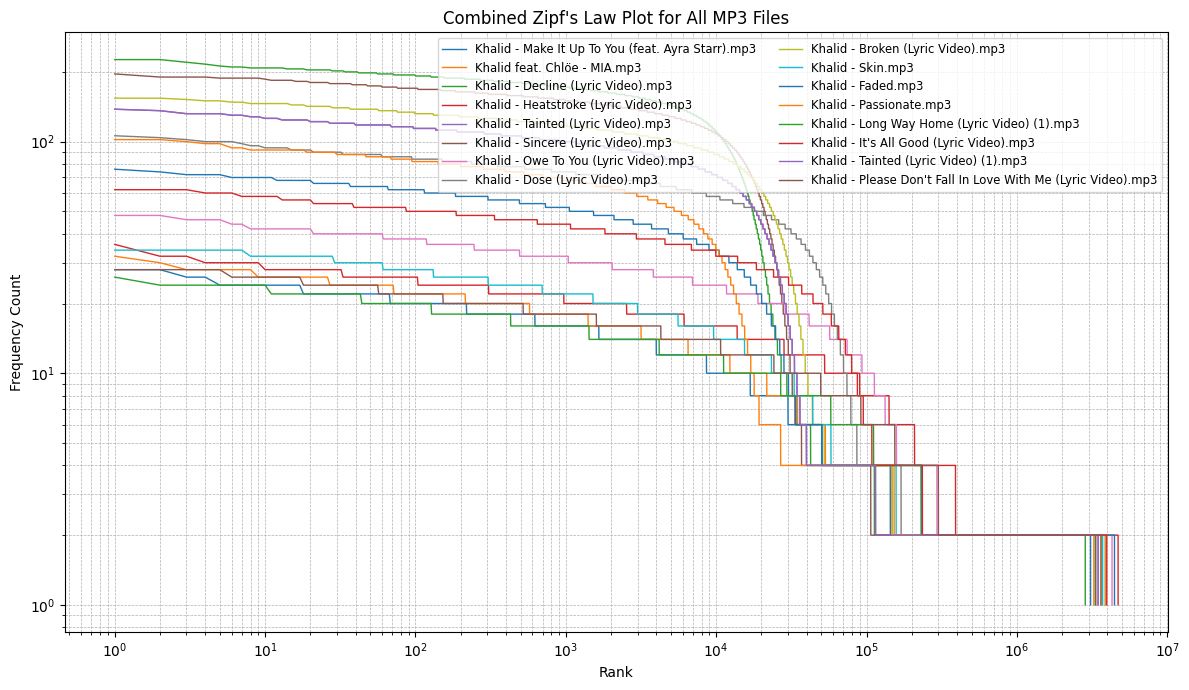

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from pydub import AudioSegment
import os


music_folder = "/content/drive/MyDrive/kahlid"

mp3_files = [f for f in os.listdir(music_folder) if f.endswith(".mp3")]

all_ranks = []
all_freqs = []


for mp3_file in mp3_files:
    mp3_path = os.path.join(music_folder, mp3_file)

    audio = AudioSegment.from_mp3(mp3_path)
    audio = audio.set_channels(1)


    wav_path = mp3_path.replace(".mp3", ".wav")
    audio.export(wav_path, format="wav")


    sample_rate, data = wavfile.read(wav_path)


    fft_result = np.fft.fft(data)
    frequencies = np.abs(fft_result)


    unique, counts = np.unique(np.round(frequencies, 1), return_counts=True)
    freq_count = dict(zip(unique, counts))


    sorted_counts = sorted(freq_count.values(), reverse=True)
    ranks = np.arange(1, len(sorted_counts) + 1)


    all_ranks.append(ranks)
    all_freqs.append(sorted_counts)


plt.figure(figsize=(12, 7))

for i in range(len(all_ranks)):
    plt.plot(all_ranks[i], all_freqs[i], label=f"{mp3_files[i]}", linewidth=1)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rank")
plt.ylabel("Frequency Count")
plt.title("Combined Zipf's Law Plot for All MP3 Files")
plt.legend(fontsize='small', ncol=2, loc="upper right")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()
